In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tqdm

C:\Users\My-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
print("The dataset has {} rows and {} columns.".format(train.shape[0], train.shape[1]))

The dataset has 7613 rows and 5 columns.


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Data Wrangling

In [5]:
# Check for missing values
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
# Check for duplicates
train.duplicated().sum()

0

In [7]:
# Drop columns with more than 50% missing values
train.dropna(thresh=train.shape[0]*0.5, axis=1, inplace=True)
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
# Impute missing values

for col in train.columns:
    if train[col].dtype == 'int64' or train[col].dtype == 'float64':
        train[col].fillna(train[col].mean(), inplace = True)

    else:
        train[col].fillna(train[col].mode()[0], inplace = True)

train.isna().any()

id          False
keyword     False
location    False
text        False
target      False
dtype: bool

In [9]:
# Check for unique values in each column
for col in train.columns:
    print(col)
    print(train[col].unique())

# Drop columns with only one unique value
for col in train.columns:
    if len(train[col].unique()) == 1:
        train.drop(col, axis=1, inplace=True)

train.shape

id
[    1     4     5 ... 10871 10872 10873]
keyword
['fatalities' 'ablaze' 'accident' 'aftershock' 'airplane%20accident'
 'ambulance' 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army'
 'arson' 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonat

(7613, 5)

In [10]:
train.head()

,id,keyword,location,text,target
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1


## Visualizing the Data

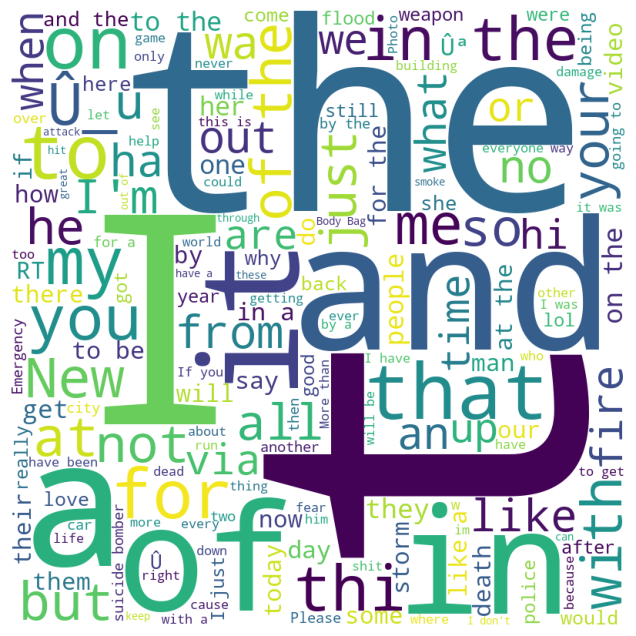

In [11]:
# Word cloud for the text column
from wordcloud import WordCloud

text = ' '.join(train['text'].values)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = ['http', 'https', 'com', 'www', 'twitter', 'pic', 'ly', 'bit', 'status', 'amp', 'co', 'youtu', 'youtube', 'watch', 'v', 'html', 'org', 'net', 'en', 'wiki', 'index', 'php', 'title', 'wikipedia', 'wikimedia', 'commons', 'media', 'file', 'jpg', 'png', 'svg', 'gif', 'pdf', 'doc', 'docx', 'xls', 'xlsx', 'ppt', 'pptx', 'txt', 'csv', 'zip', 'tar', 'gz', '7z', 'rar'], 
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)

# Remove the axis
plt.axis("off")
plt.imshow(wordcloud)
plt.show();

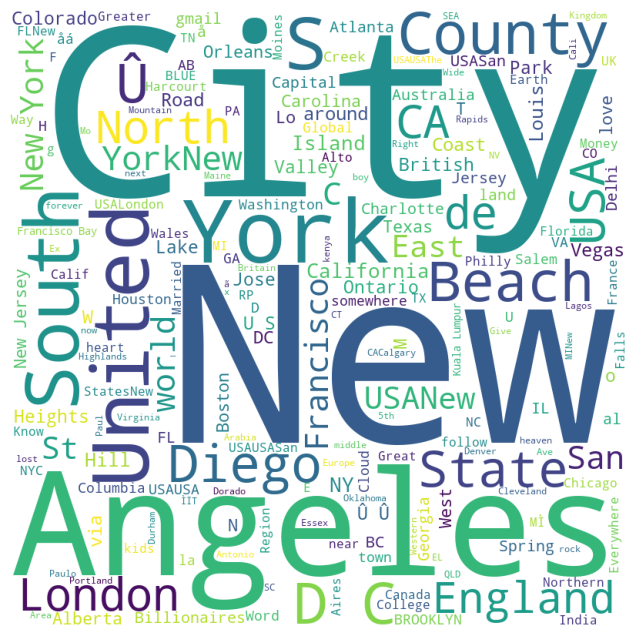

In [12]:
# Word cloud for location

text = ''.join(train['location'].values)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)

# Remove the axis
plt.axis("off")
plt.imshow(wordcloud)
plt.show();

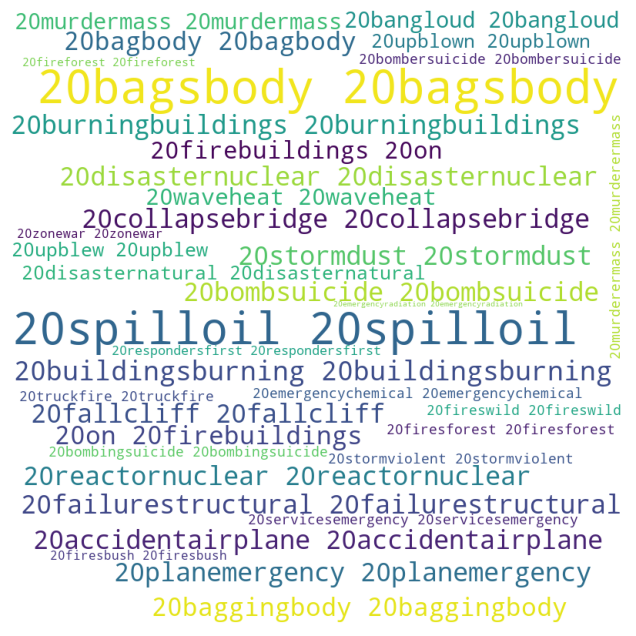

In [13]:
# Word cloud for keywords

text = ''.join(train['keyword'].values)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)

# Remove the axis
plt.axis("off")
plt.imshow(wordcloud)
plt.show();

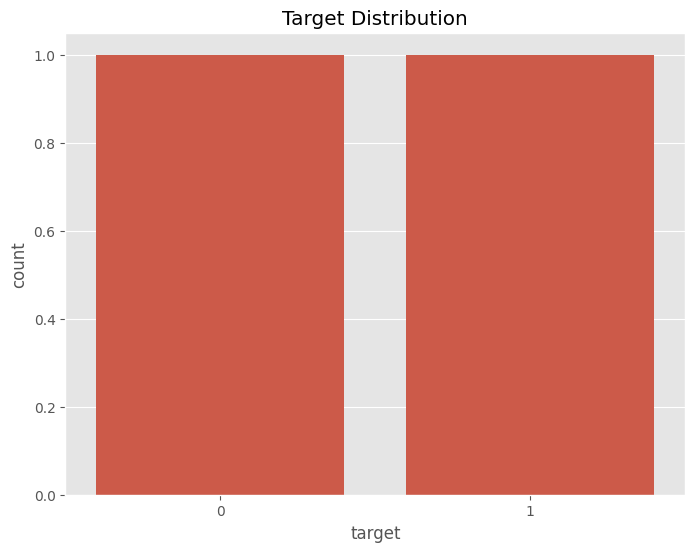

In [14]:
# Distribution of target variable
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.countplot(train['target'].value_counts(normalize=True))
plt.title('Target Distribution')
plt.show();

## Sentiment Analysis

In [15]:
# We are going to carry out a sentiment analysis on the text column to see which tweets are positive, negative or neutral

from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
    
train['sentiment'] = train['text'].apply(get_sentiment)
train.head()

,id,keyword,location,text,target,sentiment
0,1,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1,neutral
1,4,fatalities,USA,Forest fire near La Ronge Sask. Canada,1,positive
2,5,fatalities,USA,All residents asked to 'shelter in place' are ...,1,negative
3,6,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1,neutral
4,7,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1,neutral


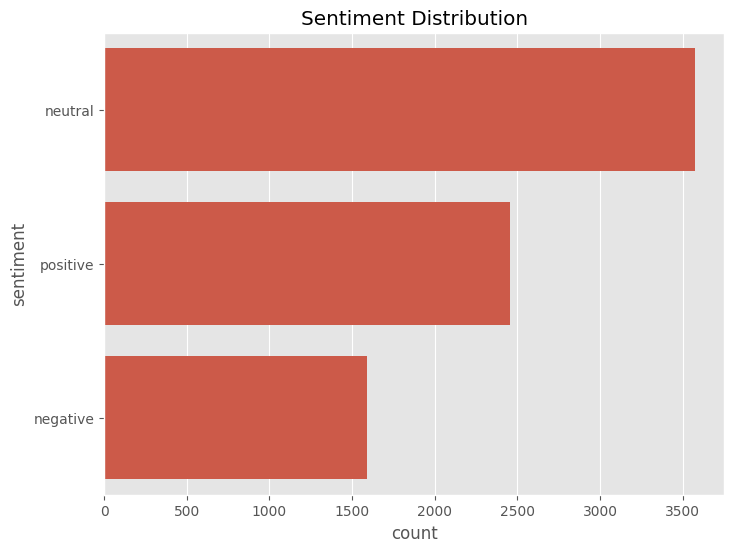

In [16]:
# Distribution of sentiment
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.countplot(train['sentiment'])
plt.title('Sentiment Distribution')
plt.show();

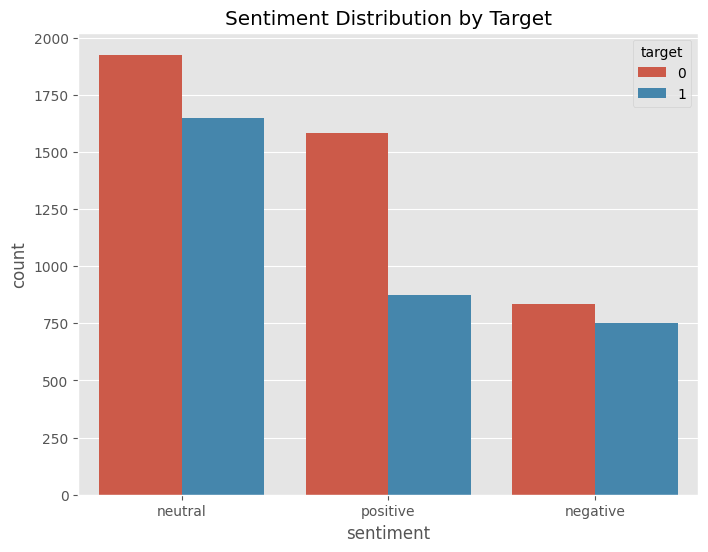

In [17]:
# Distribution of sentiment by target
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', hue='target', data=train)  # Ensure the data parameter is set
plt.title('Sentiment Distribution by Target')
plt.show();

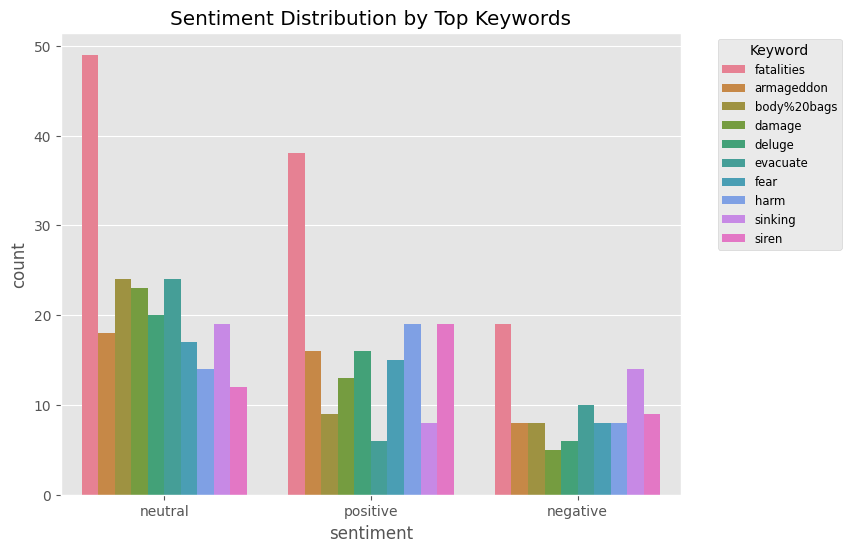

In [18]:
# Sentiment distribution by keyword
top_keywords = train['keyword'].value_counts().nlargest(10).index
filtered_train = train[train['keyword'].isin(top_keywords)]

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', hue='keyword', data=filtered_train)
plt.title('Sentiment Distribution by Top Keywords')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Keyword', title_fontsize='medium')
plt.show()

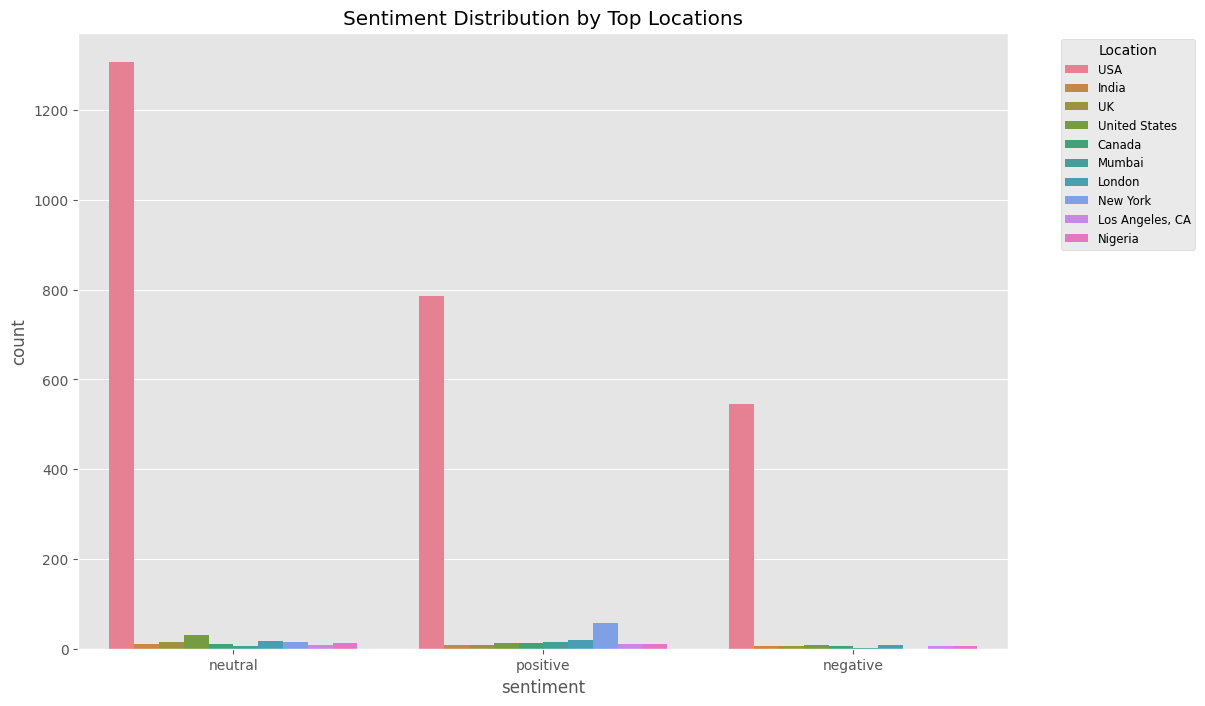

In [19]:
# Sentiment distribution by location
top_locations = train['location'].value_counts().nlargest(10).index
filtered_train = train[train['location'].isin(top_locations)]

plt.figure(figsize=(12, 8))
sns.countplot(x='sentiment', hue='location', data=filtered_train)
plt.title('Sentiment Distribution by Top Locations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Location', title_fontsize='medium')
plt.show();

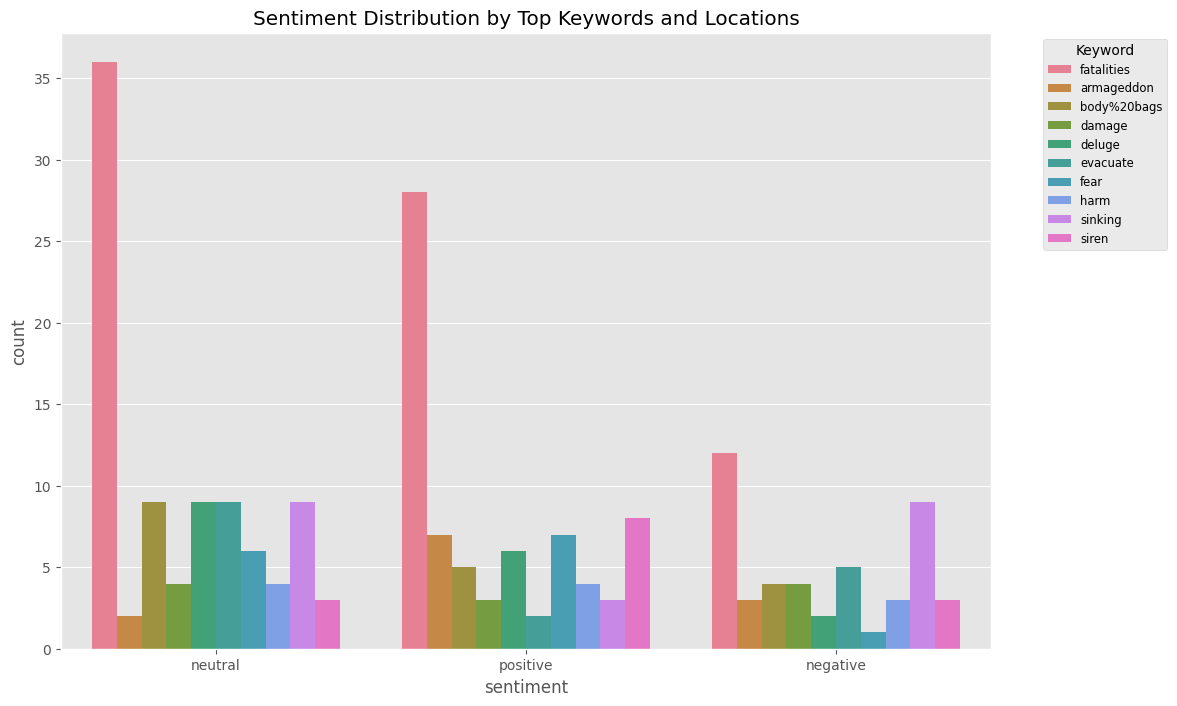

In [20]:
# Sentiment distribution by keyword and location

top_keywords = train['keyword'].value_counts().nlargest(10).index
top_locations = train['location'].value_counts().nlargest(10).index

filtered_train = train[(train['keyword'].isin(top_keywords)) & (train['location'].isin(top_locations))]
plt.figure(figsize=(12, 8))
sns.countplot(x='sentiment', hue='keyword', data=filtered_train)
plt.title('Sentiment Distribution by Top Keywords and Locations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title='Keyword', title_fontsize='medium')
plt.show();

# Modelling

In [21]:
X = train.drop(['id', 'target', 'sentiment'], axis=1) # we remove sentiment column because it is not a feature. It was created for analysis hence useless as a feature.
y = train['target']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

text_transformer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
preprocessor = ColumnTransformer(transformers=[('text', text_transformer, 'text')])
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 80.24%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.84       874
           1       0.82      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



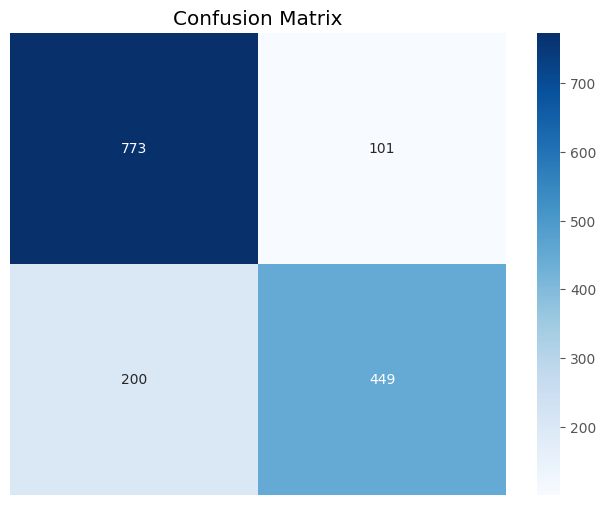

In [22]:
# Confusion matrix
# We will use a heatmap

cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
# Remove the axis
plt.axis("off")
plt.show();

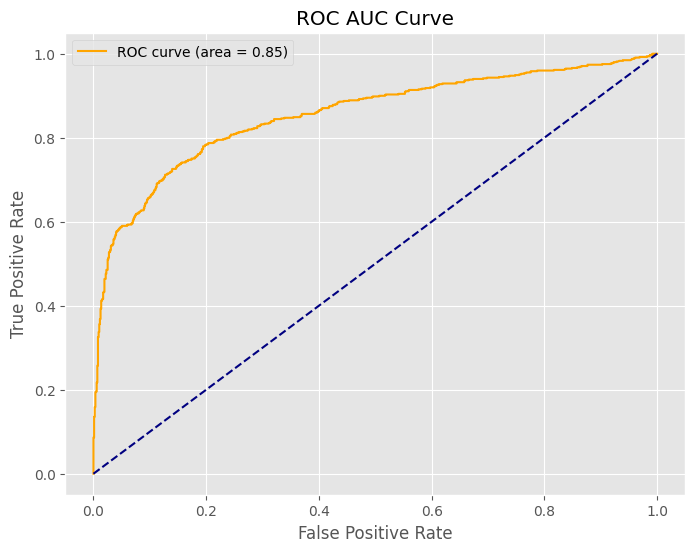

In [23]:
# ROC AUC curve
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show();

In [26]:
# Improvement of the model
# 1. Data augmentation
# We will use the nlpaug library to augment the text data. We will use the WordNet synonym technique to replace words in the text data.
import nlpaug.augmenter.word as naw

aug = naw.SynonymAug(aug_src='wordnet')

# Augment the text data
augmented_text = []
for text in X['text']:
    augmented_words = aug.augment(text)  # Get augmented words
    augmented_text.append(' '.join(augmented_words))  # Join them back into a single string

# Create a new dataframe with the augmented text data
augmented_df = X.copy()
augmented_df['text'] = augmented_text

# Split the data
X_train, X_test, y_train, y_test = train_test_split(augmented_df, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 77.08%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       874
           1       0.77      0.65      0.71       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



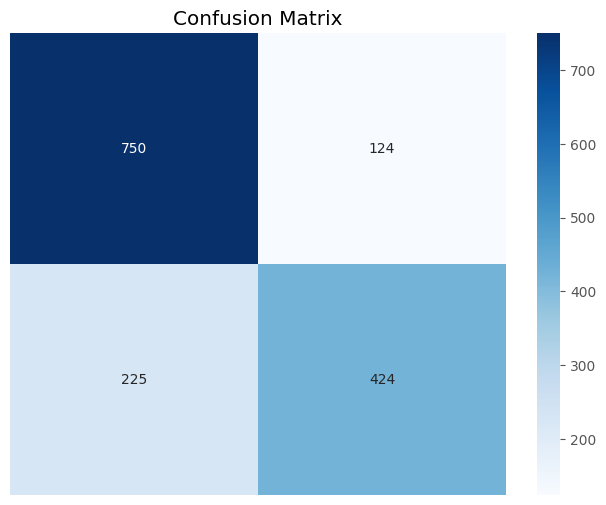

In [27]:
# Confusion matrix
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
# Remove the axis
plt.axis("off")
plt.show();

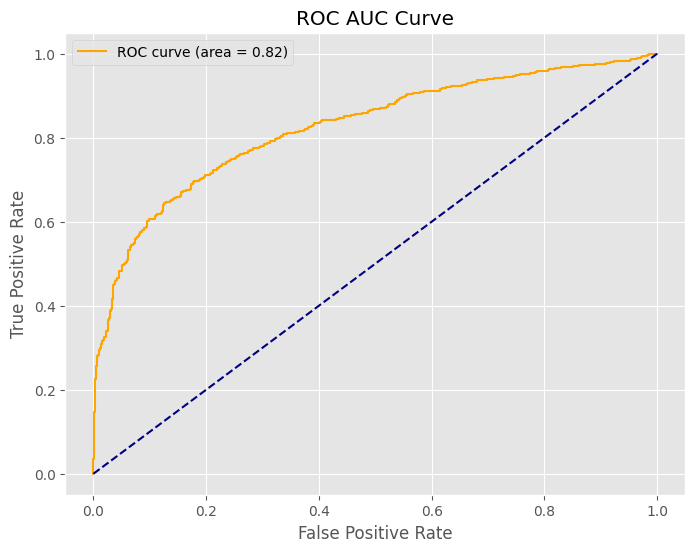

In [28]:
# ROC AUC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show();

Best Parameters: {'classifier__C': 1, 'preprocessor__text__max_features': 5000, 'preprocessor__text__ngram_range': (1, 1)}
Best Score: 0.7755336617405584
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=5000),
                                                  'text')])),
                ('classifier', LogisticRegression(C=1))])
Accuracy: 78.53%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       874
           1       0.79      0.67      0.73       649

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



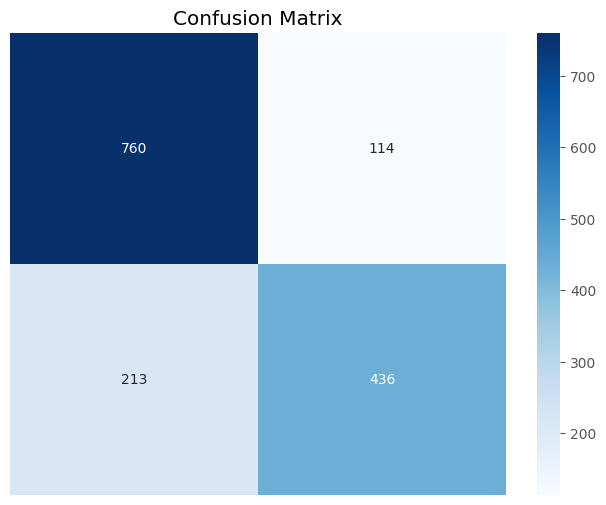

In [30]:
# 2. Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'preprocessor__text__max_features': [1000, 5000, 10000],
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)
y_pred = grid_search.predict(X_test)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
# Remove the axis
plt.axis("off")
plt.show();

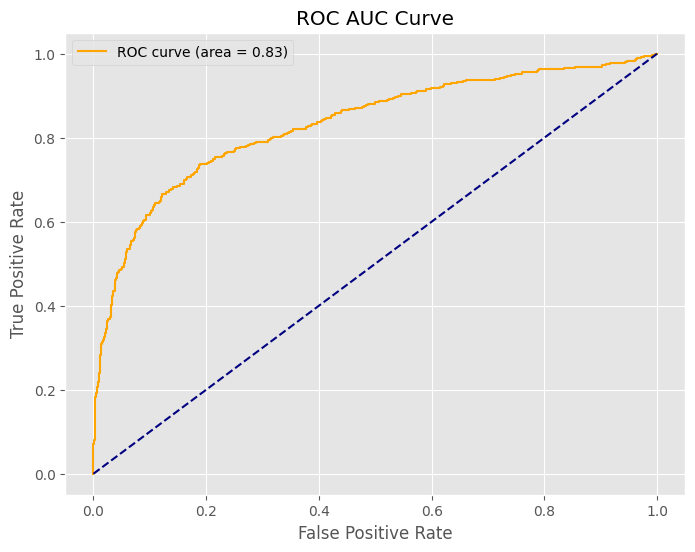

In [31]:
# ROC AUC curve
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show();

Accuracy: 73.60%

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79       874
           1       0.75      0.58      0.65       649

    accuracy                           0.74      1523
   macro avg       0.74      0.72      0.72      1523
weighted avg       0.74      0.74      0.73      1523



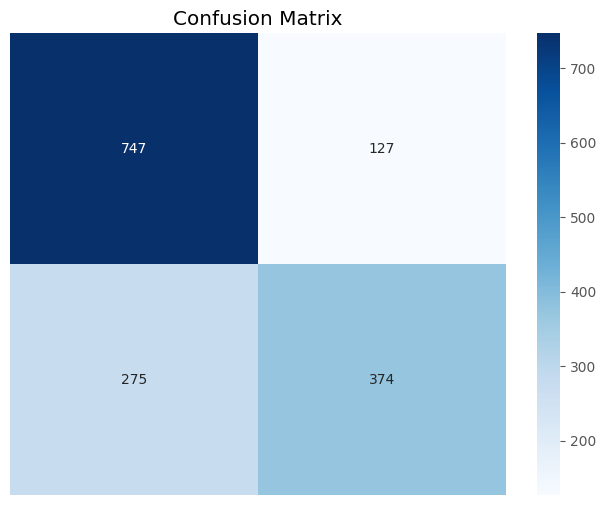

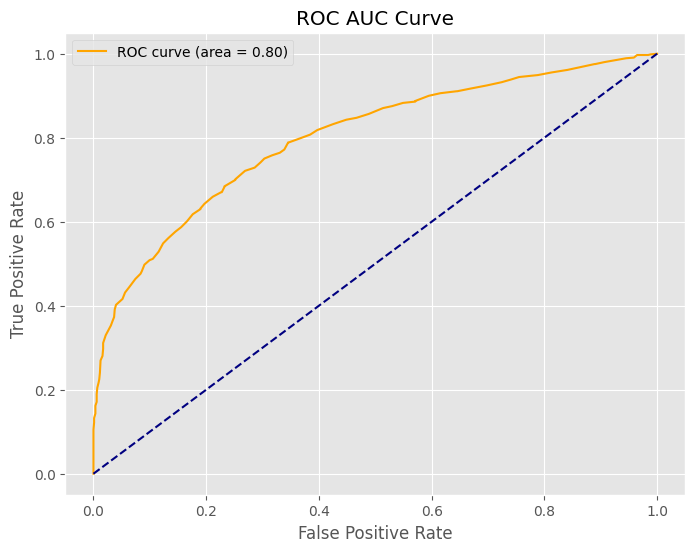

In [32]:
# 3. Ensemble methods
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
# Remove the axis
plt.axis("off")
plt.show();

# ROC AUC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show();

Best Parameters: {'classifier__max_depth': 50, 'classifier__n_estimators': 300, 'preprocessor__text__max_features': 10000, 'preprocessor__text__ngram_range': (1, 1)}
Best Score: 0.7374384236453203
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=10000),
                                                  'text')])),
                ('classifier',
                 RandomForestClassifier(max_depth=50, n_estimators=300))])
Accuracy: 73.93%

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       874
           1       0.80      0.52      0.63       649

    accuracy                           0.74      1523
   macro avg       0.76      0.71      0.71      1523
weighted avg       0.75      0.74      0.73      1523



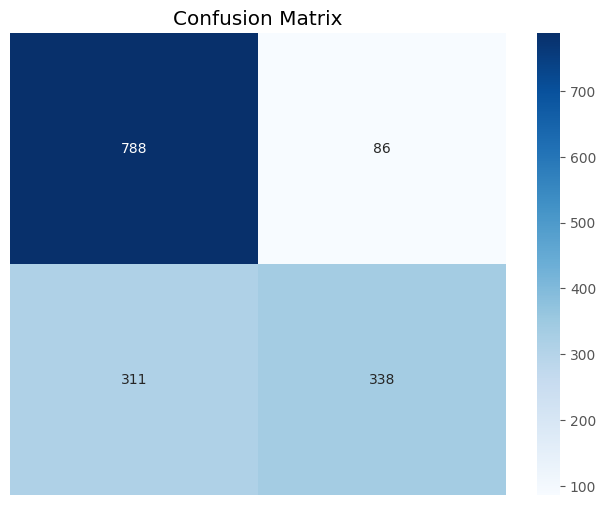

In [33]:
# Hyperameter tuning our Random Forest model
param_grid = {
    'preprocessor__text__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'preprocessor__text__max_features': [1000, 5000, 10000],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", grid_search.best_estimator_)
y_pred = grid_search.predict(X_test)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
# Remove the axis
plt.axis("off")
plt.show();

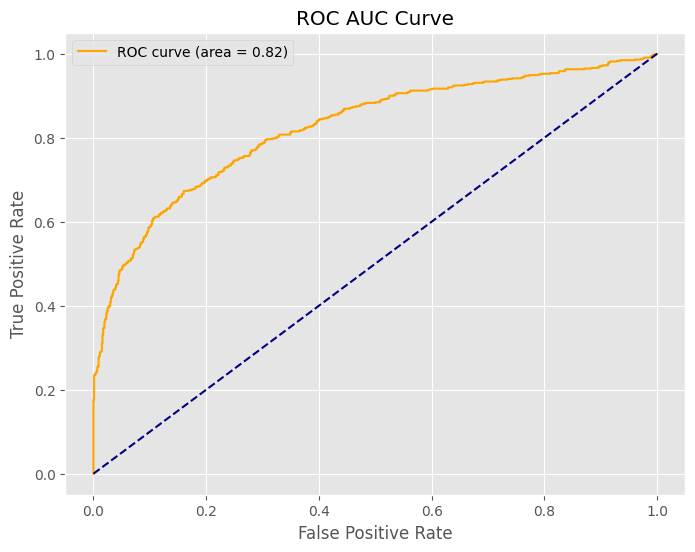

In [36]:
# ROC AUC curve
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show();

Accuracy: 76.56%

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.81       874
           1       0.81      0.59      0.68       649

    accuracy                           0.77      1523
   macro avg       0.78      0.74      0.75      1523
weighted avg       0.77      0.77      0.76      1523



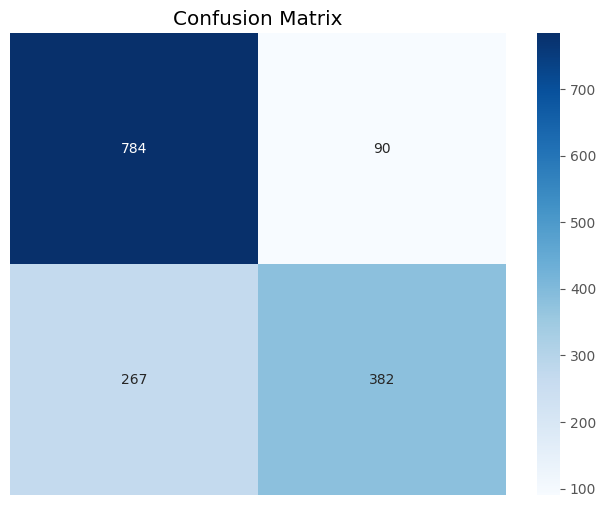

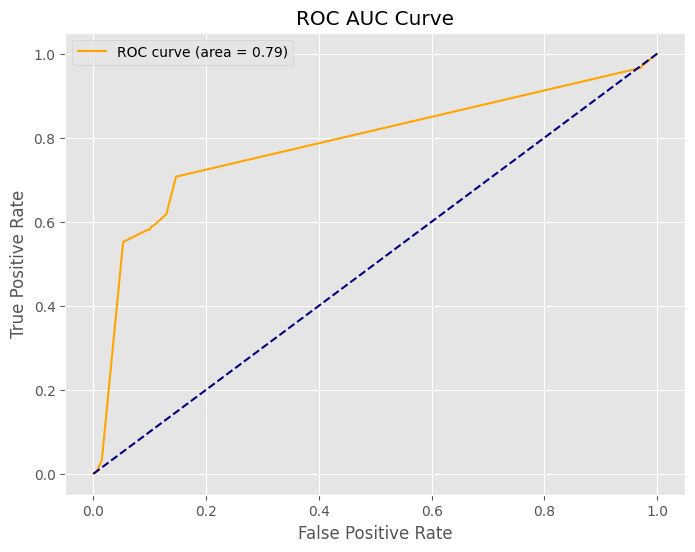

In [37]:
# 4. Stacking
# Before we stack our models, we need to create a new dataset with the predictions of the models as features.
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Create a new dataset with the predictions of the models as features
X_train_stack = pd.DataFrame()
X_test_stack = pd.DataFrame()

# Logistic Regression
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
model.fit(X_train, y_train)
X_train_stack['logistic_regression'] = model.predict(X_train)
X_test_stack['logistic_regression'] = model.predict(X_test)

# Random Forest
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])
model.fit(X_train, y_train)
X_train_stack['random_forest'] = model.predict(X_train)
X_test_stack['random_forest'] = model.predict(X_test)

# Support Vector Machine
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(probability=True))])
model.fit(X_train, y_train)
X_train_stack['svm'] = model.predict(X_train)
X_test_stack['svm'] = model.predict(X_test)

# Naive Bayes
model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', MultinomialNB())])
model.fit(X_train, y_train)
X_train_stack['naive_bayes'] = model.predict(X_train)
X_test_stack['naive_bayes'] = model.predict(X_test)

# Fit the stacking model
model = StackingClassifier(estimators=[
    ('logistic_regression', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('svm', SVC(probability=True)),
    ('naive_bayes', MultinomialNB())
], final_estimator=LogisticRegression())

model.fit(X_train_stack, y_train)
y_pred = model.predict(X_test_stack)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
# Remove the axis
plt.axis("off")
plt.show();

# ROC AUC curve
y_pred_proba = model.predict_proba(X_test_stack)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show();

Accuracy: 77.94%

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       874
           1       0.79      0.65      0.72       649

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.77      1523
weighted avg       0.78      0.78      0.78      1523



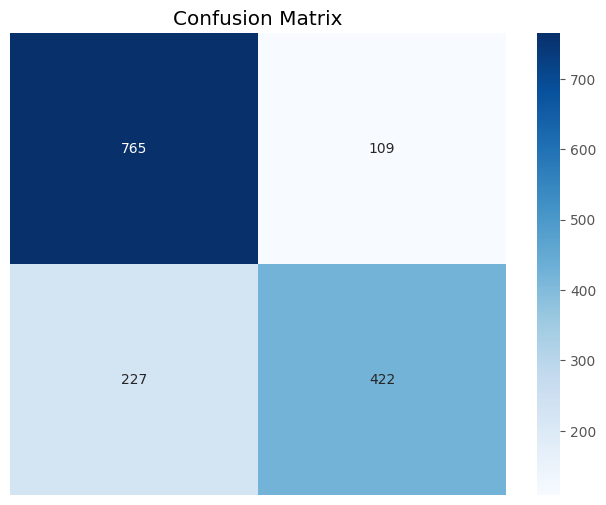

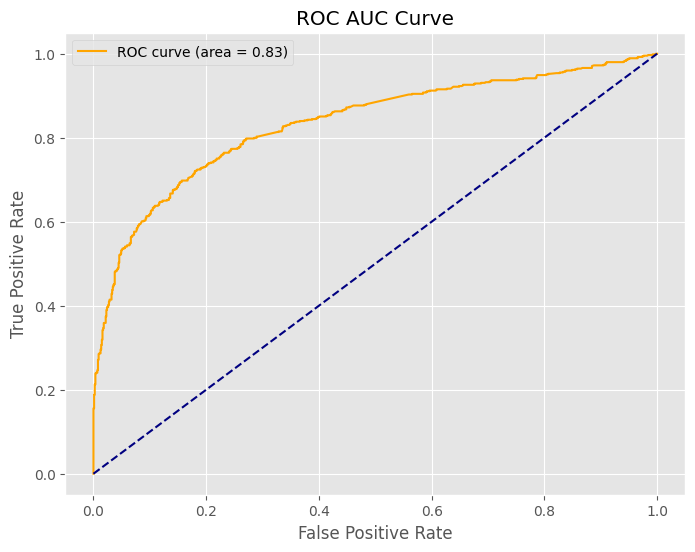

In [41]:
# XGBClassifier
from xgboost import XGBClassifier

xgb = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', XGBClassifier())])
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
# Remove the axis
plt.axis("off")
plt.show();

# ROC AUC curve
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show();

## Preprocessing the Test Data

In [42]:
test = pd.read_csv('test.csv')

# Make predictions
predictions = xgb.predict(test.drop(['id'], axis=1))

# Create a submission file
sample = pd.read_csv('sample_submission.csv')
submission = pd.DataFrame({'id': sample['id'], 'target': predictions})

submission.to_csv('submission.csv', index=False)